# Model selection
## Best subset
- Here we apply the best subset selection approach to the `Hitters` data
- We wish to predict a baseball player’s `Salary` on the basis of various statistics associated with performance in the previous year.

In [1]:
# Best Subset Selection
library(ISLR)
head(Hitters)
dim(Hitters)
sum(is.na(Hitters$Salary))

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NA,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


[1] 322  20

[1] 59

In [2]:
Hitters=na.omit(Hitters)
dim(Hitters)
sum(is.na(Hitters))

[1] 263  20

[1] 0

- The `regsubsets()` function (part of the leaps library) performs best subset selection by identifying the best model that contains a given number of predictors
- _best_ is quantified using RSS
- `summary()` command outputs the best set of variables for each model size

In [3]:
# Chapter 6 Lab 1: Subset Selection Methods
library(leaps)
regfit.full=regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

- By default, `regsubsets()` only reports results up to the best eight-variable model.
- the `nvmax` option can be used in order to return as many variables as are desired

In [4]:
regfit.full=regsubsets(Salary~.,data=Hitters,nvmax=19)
reg.summary=summary(regfit.full)
names(reg.summary)
reg.summary$rsq

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 0.3214501 0.4252237 0.4514294 0.4754067 0.4908036 0.5087146 0.5141227
 [8] 0.5285569 0.5346124 0.5404950 0.5426153 0.5436302 0.5444570 0.5452164
[15] 0.5454692 0.5457656 0.5459518 0.5460945 0.5461159

- The `summary()` function also returns R2, RSS, adjusted R2, Cp, and BIC. We can examine these to try to select the best overall model.
recall:
$$C_p=\frac{1}{n}(RSS+2d\hat{\sigma}^2)$$
$$AIC=\frac{1}{n\hat{\sigma}^2}(RSS+2d\hat{\sigma}^2)$$
$$BIC=\frac{1}{n\hat{\sigma}^2}(RSS+\log(n)d\hat{\sigma}^2)$$
$$adjR^2=1-\frac{RSS/(n-d-1)}{TSS/(n-1)}$$

[1] 11

[1] 10

[1] 6

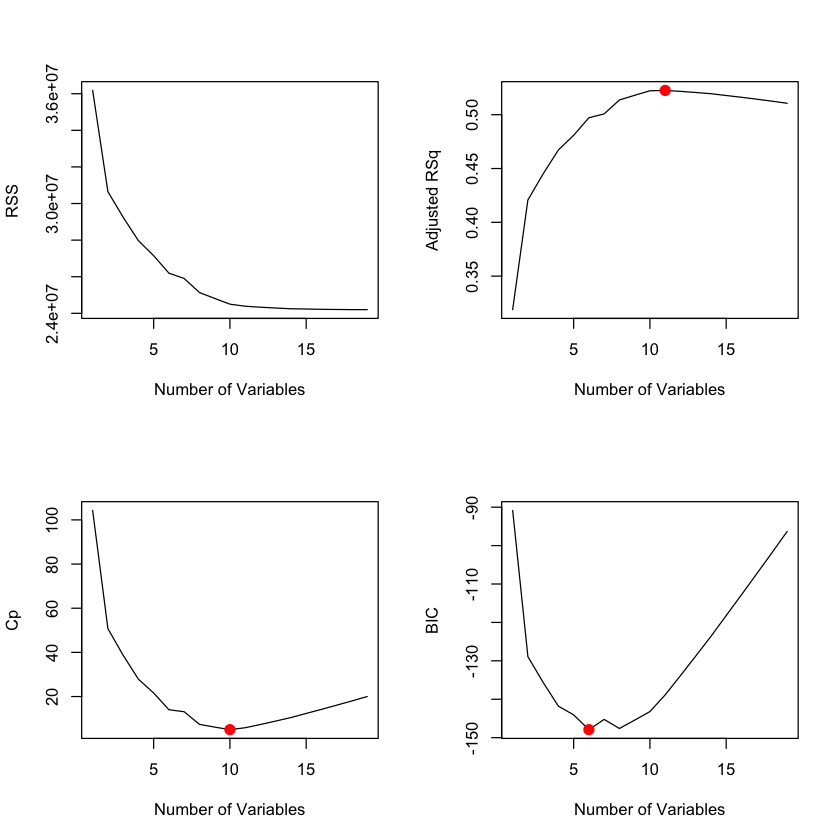

In [5]:
par(mfrow=c(2,2))
plot(reg.summary$rss,xlab="Number of Variables",ylab="RSS",type="l")
plot(reg.summary$adjr2,xlab="Number of Variables",ylab="Adjusted RSq",type="l")

which.max(reg.summary$adjr2)
points(11,reg.summary$adjr2[11], col="red",cex=2,pch=20)
plot(reg.summary$cp,xlab="Number of Variables",ylab="Cp",type='l')
which.min(reg.summary$cp)
points(10,reg.summary$cp[10],col="red",cex=2,pch=20)
which.min(reg.summary$bic)
plot(reg.summary$bic,xlab="Number of Variables",ylab="BIC",type='l')
points(6,reg.summary$bic[6],col="red",cex=2,pch=20)

- The `regsubsets()` function has a built-in `plot()` command which can be used to display the selected variables for the best model with a given number of predictors, ranked according to the BIC, Cp, adjusted R2, or AIC.

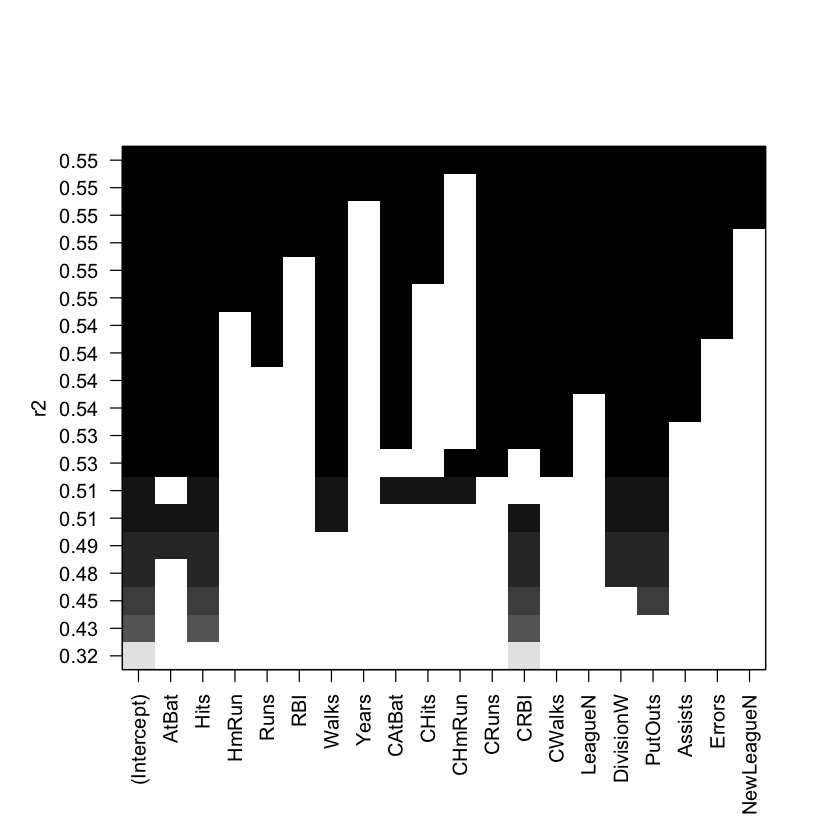

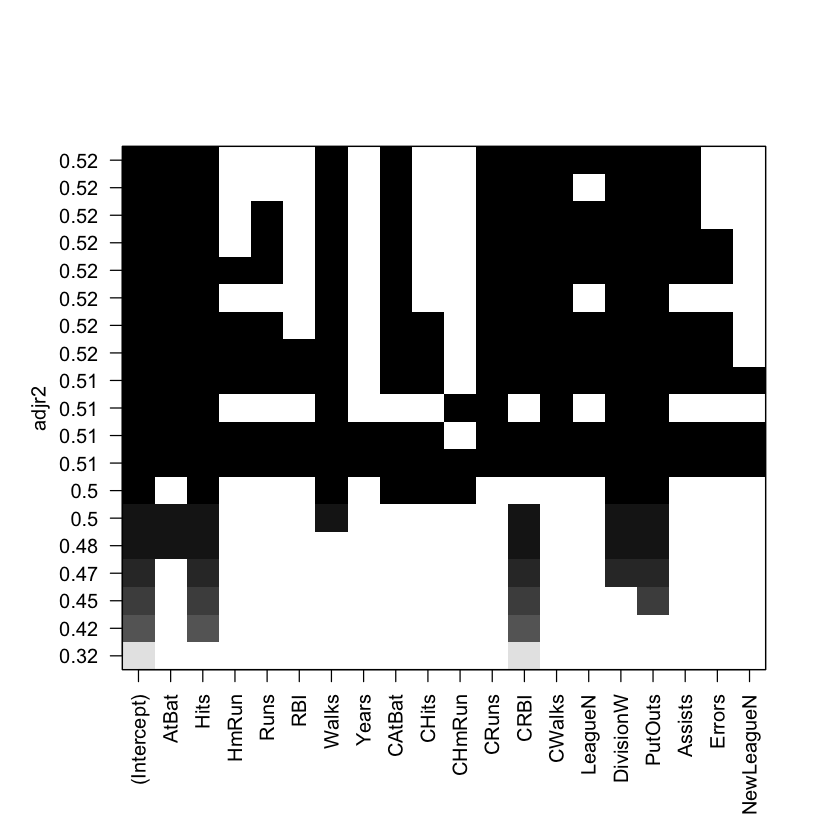

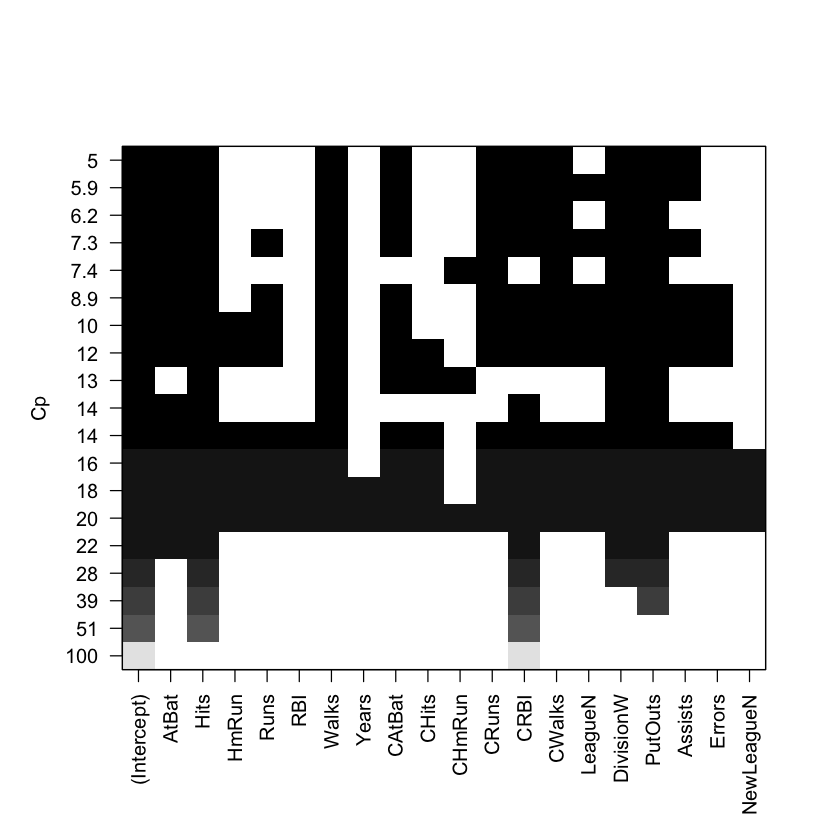

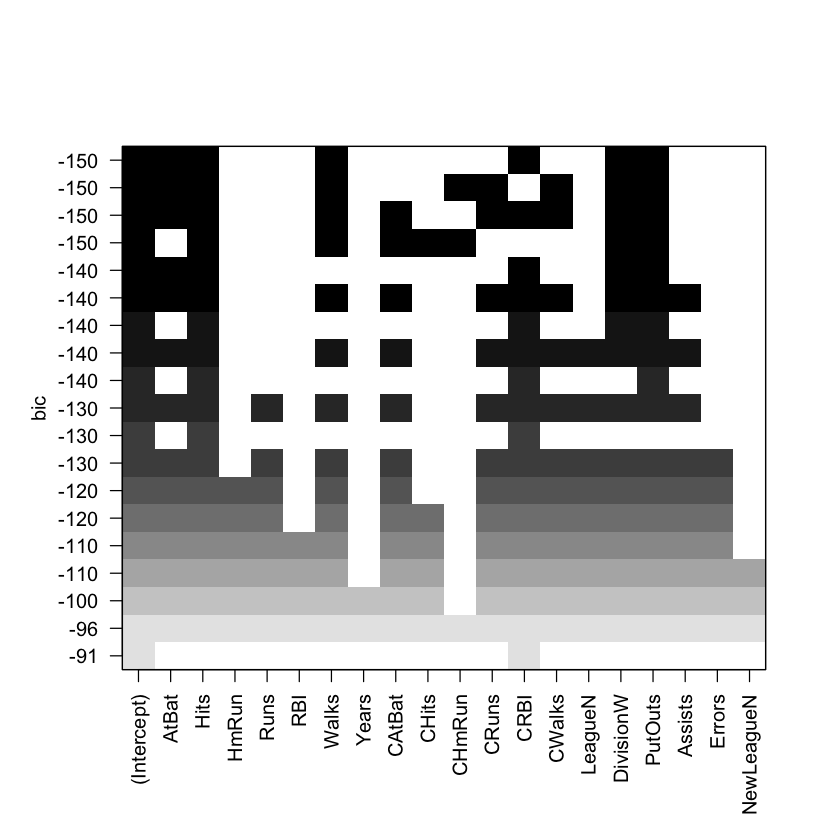

In [6]:
plot(regfit.full,scale="r2")
plot(regfit.full,scale="adjr2")
plot(regfit.full,scale="Cp")
plot(regfit.full,scale="bic")

- coefficients can be accessed using `coef()`

In [7]:
 coef(regfit.full,6) # the sixth model ,which has the smallest BIC

(Intercept)        AtBat         Hits        Walks         CRBI    DivisionW 
  91.5117981   -1.8685892    7.6043976    3.6976468    0.6430169 -122.9515338 
     PutOuts 
   0.2643076

- We can also use the `regsubsets()` function to perform forward stepwiseor backward stepwise selection, using the argument `method="forward"` or `method="backward"`.

In [8]:
# Forward and Backward Stepwise Selection

regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="forward")
summary(regfit.fwd)
regfit.bwd=regsubsets(Salary~.,data=Hitters,nvmax=19,method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


- the best seven-variable models identified by forward stepwise selection, backward stepwise selection, and best subset selection are different.

In [9]:
coef(regfit.full,7)
coef(regfit.fwd,7)
coef(regfit.bwd,7)

(Intercept)         Hits        Walks       CAtBat        CHits       CHmRun 
  79.4509472    1.2833513    3.2274264   -0.3752350    1.4957073    1.4420538 
   DivisionW      PutOuts 
-129.9866432    0.2366813

(Intercept)        AtBat         Hits        Walks         CRBI       CWalks 
 109.7873062   -1.9588851    7.4498772    4.9131401    0.8537622   -0.3053070 
   DivisionW      PutOuts 
-127.1223928    0.2533404

(Intercept)        AtBat         Hits        Walks        CRuns       CWalks 
 105.6487488   -1.9762838    6.7574914    6.0558691    1.1293095   -0.7163346 
   DivisionW      PutOuts 
-116.1692169    0.3028847

## Choosing among models using the validation set and cross-validation approach
- To obtain an accurate estimate of prediction error, we now consider the validation set approach


In [10]:
# Choosing Among Models
set.seed(10)
train=sample(c(TRUE,FALSE), nrow(Hitters),rep=TRUE)  # obtain the training indices
test=(!train) # obtain the testing indices

regfit.best=regsubsets(Salary~.,data=Hitters[train,],nvmax=19)

- The `model.matrix()` function is used in many regression packages for building an “X” matrix from data.

In [11]:
test.mat=model.matrix(Salary~.,data=Hitters[test,])
head(test.mat)
head(Hitters[test,])

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Andre Dawson,1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,1,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Argenis Salazar,1,298,73,0,24,24,7,3,509,108,0,41,37,12,0,1,121,283,9,0
-Andres Thomas,1,323,81,6,26,32,8,2,341,86,6,32,34,8,1,1,143,290,19,1
-Andy VanSlyke,1,418,113,13,48,61,47,4,1512,392,41,205,204,203,1,0,211,11,7,1


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
-Andy VanSlyke,418,113,13,48,61,47,4,1512,392,41,205,204,203,N,E,211,11,7,550.0,N


- Now we run a loop
- for each size i, we extract the coefficients from regfit.best for the best model of that size
- multiply them into the appropriate columns of the test model matrix to form the predictions
- and compute the test MSE.

In [12]:
val.errors=rep(NA,19)
for(i in 1:19){
   coefi=coef(regfit.best,id=i)
   pred=test.mat[,names(coefi)]%*%coefi
   val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}
val.errors
which.min(val.errors)

[1] 157243.3 134782.6 138818.8 133661.2 126283.6 130690.4 132422.4 120438.9
 [9] 113292.9 113980.1 113863.2 115047.6 115091.9 114159.8 114191.9 113867.2
[17] 115013.5 114843.8 114690.4

[1] 9

- The best model is the one that contains 9 variables

In [13]:
coef(regfit.best,which.min(val.errors))

(Intercept)        AtBat         Hits        Walks        CRuns         CRBI 
  25.9697302   -1.2349099    4.9671184    6.3780946    0.5712722    0.6378636 
      CWalks      LeagueN    DivisionW      PutOuts 
  -0.8671659  102.4923435 -129.6244255    0.1607893

- This was a little tedious, partly because there is no `predict()` method for `regsubsets()`. 
- Since we will be using this function again, we can capture our steps above and write our own predict method.

In [14]:
predict.regsubsets=function(object,newdata,id,...){
  form=as.formula(object$call[[2]])
  mat=model.matrix(form,newdata)
  coefi=coef(object,id=id)
  xvars=names(coefi)
  mat[,xvars]%*%coefi
  }

- We now use the best nine-variable model
- We need to use the whole dataset wo select the nine variables
- the validation process is only for selecting the number of variables to include

In [15]:
regfit.best=regsubsets(Salary~.,data=Hitters,nvmax=19)
coef(regfit.best,9)

(Intercept)         AtBat          Hits         Walks        CAtBat 
 146.24960033   -1.93676754    6.65672102    5.55204413   -0.09953904 
        CRuns          CRBI        CWalks     DivisionW       PutOuts 
   1.25067124    0.66176849   -0.77798498 -115.34950146    0.27773062

## k-fold cross-validation
- We now try to choose among the models of different sizes using crossvalidation.
- we must perform best subset selection within each of the k training sets.
- First, we create a vector that allocates each observation to one of k = 10 folds
- and we create a matrix in which we will store the results.

In [16]:
k=10
set.seed(1)
folds=sample(1:k,nrow(Hitters),replace=TRUE)
cv.errors=matrix(NA,k,19, dimnames=list(NULL, paste(1:19)))

- Now we write a for loop that performs cross-validation. 
- In the jth fold, theelements of folds that equal j are in the test set, and the remainder are in the training set.
- We make our predictions for each model size (using our new `predict()` method), compute the test errors on the appropriate subset
- and store them in the appropriate slot in the matrix `cv.errors`.

In [17]:
for(j in 1:k){
  best.fit=regsubsets(Salary~.,data=Hitters[folds!=j,],nvmax=19)
  for(i in 1:19){
    pred=predict(best.fit,Hitters[folds==j,],id=i)
    cv.errors[j,i]=mean( (Hitters$Salary[folds==j]-pred)^2)
    }
  }

- This has given us a 10×19 matrix, of which the (i, j)th element corresponds to the test MSE for the ith cross-validation fold for the best j-variable model.
- We use the `colMeans()` function to average over the columns of thismatrix in order to obtain a vector for which the jth element is the crossvalidation
error for the j-variable model.

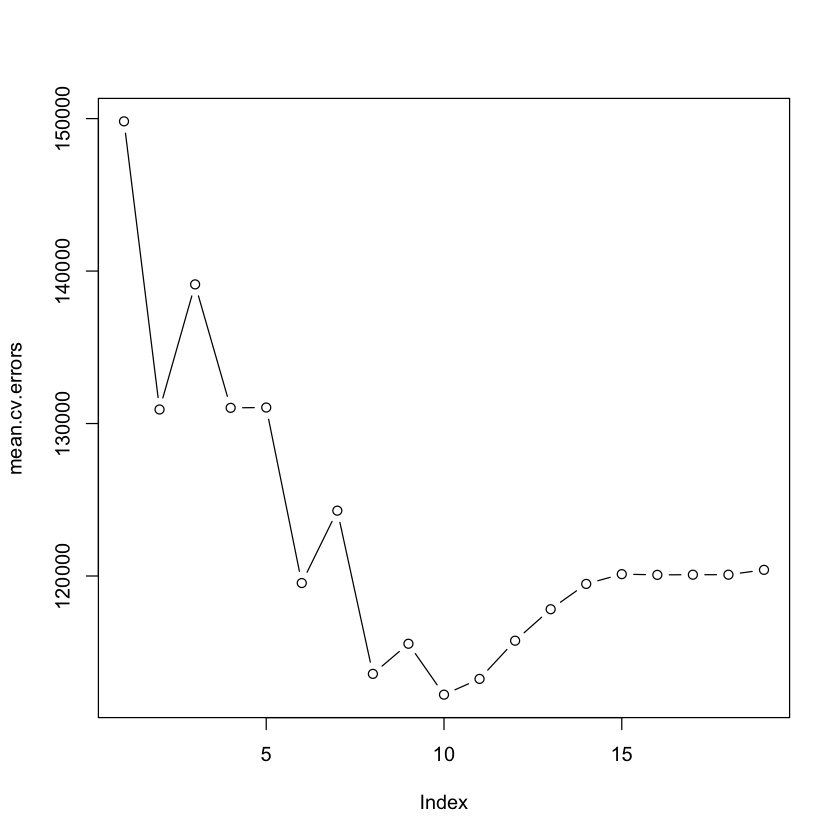

In [18]:
mean.cv.errors=colMeans(cv.errors)
par(mfrow=c(1,1))
plot(mean.cv.errors,type='b')

- We see that cross-validation selects an 10-variable model. We now perform best subset selection on the full data set in order to obtain the 10-variable model.

In [19]:
reg.best=regsubsets(Salary~.,data=Hitters, nvmax=19)
coef(reg.best,10)

(Intercept)        AtBat         Hits        Walks       CAtBat        CRuns 
 162.5354420   -2.1686501    6.9180175    5.7732246   -0.1300798    1.4082490 
        CRBI       CWalks    DivisionW      PutOuts      Assists 
   0.7743122   -0.8308264 -112.3800575    0.2973726    0.2831680

## Ridge Regession and Lasso
- We will use the glmnet package in order to perform ridge regression and the lasso.
- The main function in this package is `glmnet()`, which can be used to fit ridge regression models, lasso models, and more. 
- This function has slightly different syntax from other model-fitting functions that we have encountered thus far.
- In particular, we must pass in an x matrix as well as a y vector, and __we do not use the y ∼ x syntax__.

In [20]:
x=model.matrix(Salary~.,Hitters)[,-1]
y=Hitters$Salary
head(model.matrix(Salary~.,Hitters))
head(x)
head(y)

,(Intercept),AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,1,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,1,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,1,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,1,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,1,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Al Newman,1,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,1,0,200,11,3,1
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,1,0,805,40,4,1
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,0,1,282,421,25,0
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,1,0,76,127,7,0


[1] 475.0 480.0 500.0  91.5 750.0  70.0

- The `glmnet()` function has an alpha argument that determines what type of model is fit.
- If `alpha=0` then a __ridge__ regression model is fit, and if `alpha=1` then a __lasso__ model is fit.
- By default the `glmnet()` function performs ridge regression for an automatically selected range of λ values. 
- However, here we have chosen to implement the function over a grid of values ranging from $\lambda=10^{10}$ to $\lambda=10^{-2}$
- It covers the full range of scenarios from the null model containing only the intercept, to the least squares fit.

In [21]:
# Ridge Regression

library(glmnet)
grid=10^seq(10,-2,length=100)
ridge.mod=glmnet(x,y,alpha=0,lambda=grid)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



- Associated with each value of λ is a vector of ridge regression coefficients, stored in a matrix that can be accessed by `coef()`. 
- In this case, it is a 20×100 matrix, with 20 rows (one for each predictor, plus an intercept) and 100 columns (one for each value of λ).

In [22]:
dim(coef(ridge.mod))

[1]  20 100

- We expect the coefficient estimates to be much smaller, in terms of $l_2$ norm,when a large value of λ is used, as compared to when a small value of λ is used. 
- These are the coefficients when λ = 11,498, along with their $l_2$ norm:

In [23]:
ridge.mod$lambda[50]
coef(ridge.mod)[,50]
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

- In contrast, here are the coefficients when λ = 705, along with their $l_2$ norm. 
- Note the much larger $l_2$ norm of the coefficients associated with this smaller value of λ.

In [24]:
ridge.mod$lambda[60]
coef(ridge.mod)[,60]
sqrt(sum(coef(ridge.mod)[-1,60]^2))

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

[1] 57.11001

- We can use the` predict()` function for a number of purposes.
- For instance, we can obtain the ridge regression coefficients for a new value of λ, say 50:

In [25]:
predict(ridge.mod,s=50,type="coefficients")[1:20,]

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

- We now split the samples into a training set and a test set in order to estimate the test error of ridge regression and the lasso.

In [26]:
set.seed(1)
train=sample(1:nrow(x), nrow(x)/2)
test=(-train)
y.test=y[test]
ridge.mod=glmnet(x[train,],y[train],alpha=0,lambda=grid, thresh=1e-12)
ridge.pred=predict(ridge.mod,s=4,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 142199.2

- When $\lambda$ is large, all parameters have small absolute values due to strong penalty.
- The result will be close to the one obtained by fitting only an intercept term

In [27]:
mean((mean(y[train])-y.test)^2)
ridge.pred=predict(ridge.mod,s=1e10,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 224669.9

[1] 224669.8

- When $\lambda$ is small, all parameters will tend to the LSE due to mild penalty.

In [28]:
ridge.pred=predict(ridge.mod,s=0,newx=x[test,],exact=T,x=x[train,],y=y[train])
mean((ridge.pred-y.test)^2)
lm(y~x, subset=train)
predict(ridge.mod,s=0,exact=T,type="coefficients",x=x[train,],y=y[train])[1:20,]

[1] 168588.6


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI  
   274.0145      -0.3521      -1.6377       5.8145       1.5424       1.1243  
     xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns  
     3.7287     -16.3773      -0.6412       3.1632       3.4008      -0.9739  
      xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists  
    -0.6005       0.3379     119.1486    -144.0831       0.1976       0.6804  
    xErrors  xNewLeagueN  
    -4.7128     -71.0951  


(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.0200994   -0.3521900   -1.6371383    5.8146692    1.5423361    1.1241837 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7288406  -16.3795195   -0.6411235    3.1629444    3.4005281   -0.9739405 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.6003976    0.3378422  119.1434637 -144.0853061    0.1976300    0.6804200 
      Errors   NewLeagueN 
  -4.7127879  -71.0898914

- In general, instead of arbitrarily choosing λ = 4, it would be better to use cross-validation to choose the tuning parameter λ.
- We can do this using the built-in cross-validation function,` cv.glmnet()`.
- By default, the function `cv.glmnet()` performs __ten-fold__ cross-validation, though this can be changed using the argument nfolds.

[1] 326.0828

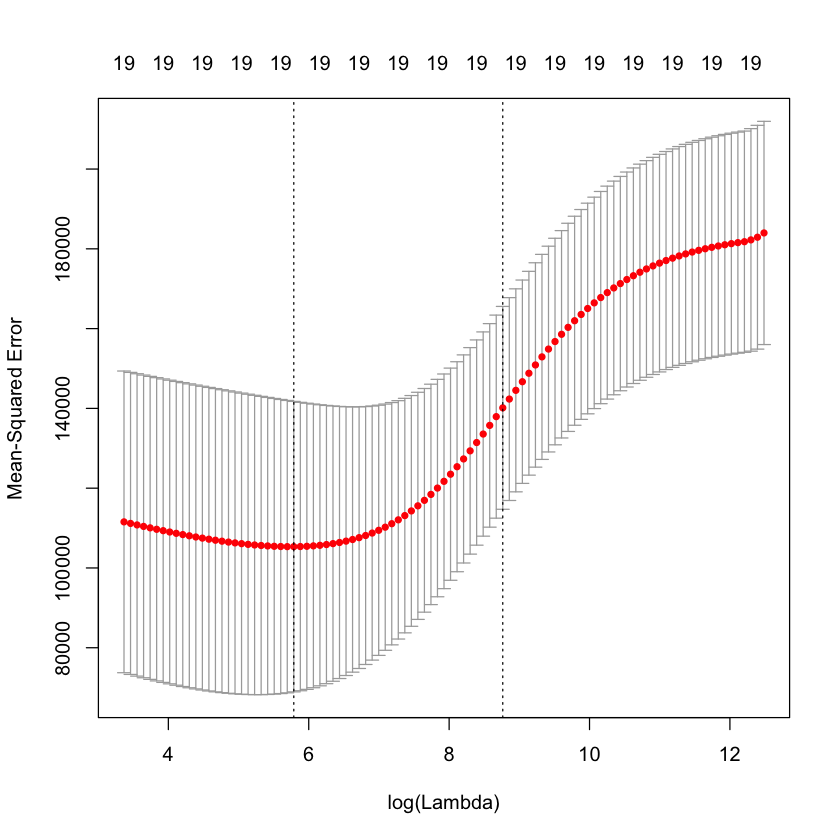

In [29]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam

- Therefore, we see that the value of λ that results in the smallest crossvalidation error is 326.08278854596
- We can obtain the test MSE for this $\lambda$

In [30]:
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test,])
mean((ridge.pred-y.test)^2)

[1] 139856.6

- It outperforms both LSE and the model with only the intercept.
- Finally, we refit the model using the best $\lambda$ 

In [31]:
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam)[1:20,]

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 15.44383135   0.07715547   0.85911581   0.60103107   1.06369007   0.87936105 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.62444616   1.35254780   0.01134999   0.05746654   0.40680157   0.11456224 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12116504   0.05299202  22.09143189 -79.04032637   0.16619903   0.02941950 
      Errors   NewLeagueN 
 -1.36092945   9.12487767

## LASSO model
- In order to fit a lasso model, we once again use the `glmnet()` function;
- however, this time we use the argument `alpha=1`.

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

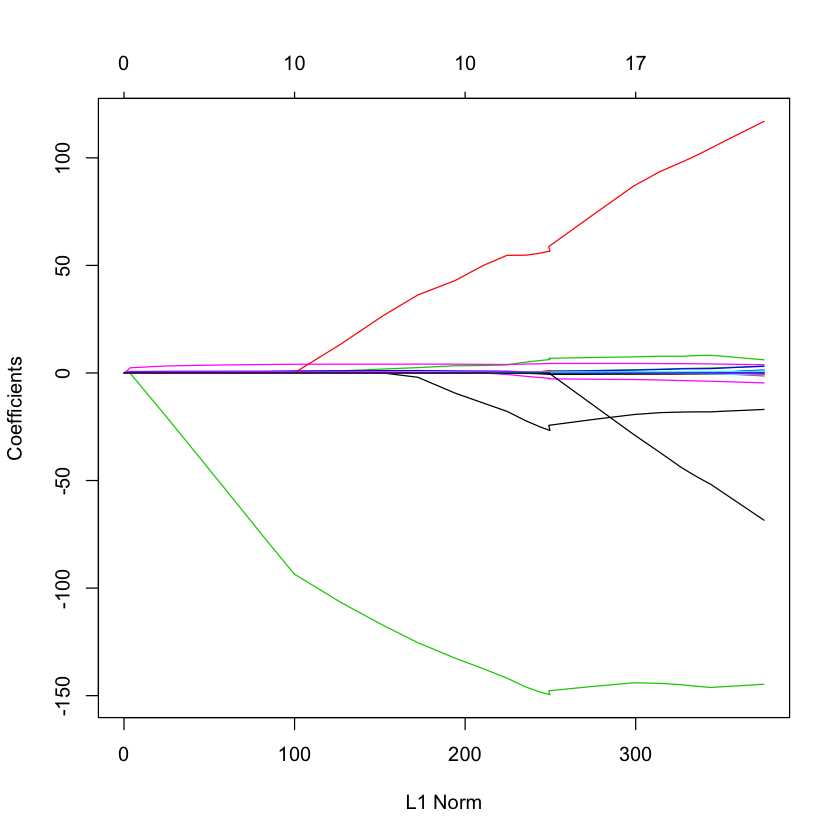

In [32]:
# The Lasso

lasso.mod=glmnet(x[train,],y[train],alpha=1,lambda=grid)
plot(lasso.mod)

- We now perform cross-validation and compute the associated test error.

[1] 143673.6

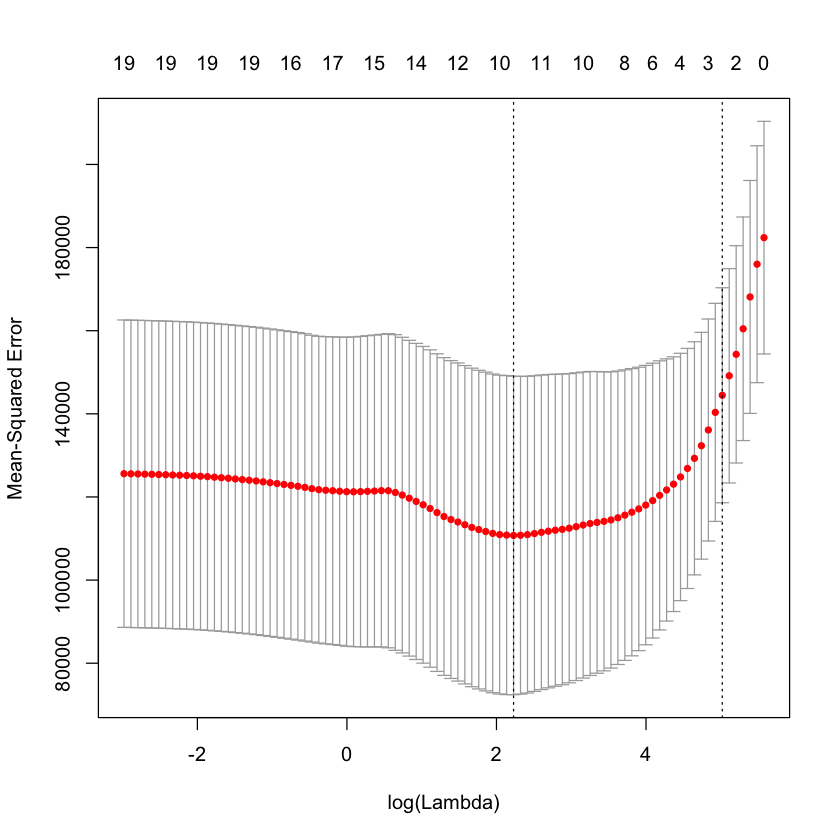

In [33]:
set.seed(1)
cv.out=cv.glmnet(x[train,],y[train],alpha=1)
plot(cv.out)
bestlam=cv.out$lambda.min
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test,])
mean((lasso.pred-y.test)^2)

- This is substantially lower than the test set MSE of the null model and of least squares, and very similar to the test MSE of ridge regression with λ chosen by cross-validation.
- However, the lasso has an advantage over ridge regression in that the resulting coefficient estimates are sparse. (interpretability)

In [34]:
out=glmnet(x,y,alpha=1,lambda=grid)
lasso.coef=predict(out,type="coefficients",s=bestlam)[1:20,]
lasso.coef
lasso.coef[lasso.coef!=0]

(Intercept)         AtBat          Hits         HmRun          Runs 
   1.27479059   -0.05497143    2.18034583    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.29192406   -0.33806109    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.02825013    0.21628385    0.41712537    0.00000000   20.28615023 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.16755870    0.23752385    0.00000000   -0.85629148    0.00000000

(Intercept)         AtBat          Hits         Walks         Years 
   1.27479059   -0.05497143    2.18034583    2.29192406   -0.33806109 
       CHmRun         CRuns          CRBI       LeagueN     DivisionW 
   0.02825013    0.21628385    0.41712537   20.28615023 -116.16755870 
      PutOuts        Errors 
   0.23752385   -0.85629148

- Half of the coefficients are shrinked to zeros!